In [196]:
import numpy as np
import optimisation as opt
import moments_backend as est
import importlib
import noise as nois
import utils as utl
importlib.reload(opt)
importlib.reload(est)

importlib.reload(nois)
importlib.reload(utl)

<module 'utils' from '/Users/krzywdaja/Documents/Science/Science/Projects/Estimation-AI/Code/utils.py'>

## Open AI gym


In [197]:

import numpy as np
# Load the TensorBoard notebook extension
%load_ext tensorboard
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


2.3500846687726673


/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_23097/1581782589.py:20: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x)+c


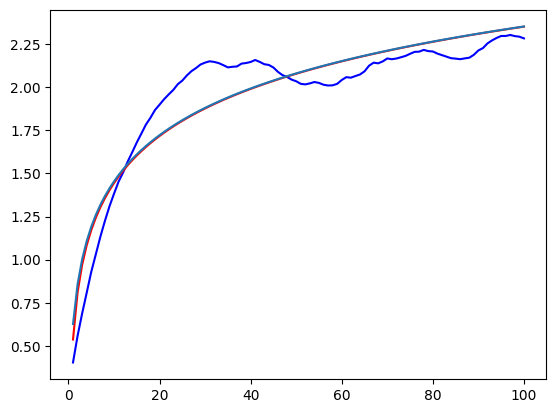

In [220]:
noise1f = nois.Over_f_noise(n_fluctuators = 10, S1 = 0.2*1e-2, sigma_couplings = 0.1, ommax = 1/10, ommin = 1/50000)
y = []
for k in range(500):
    y.append(noise1f.update(1))

y = np.array(y)
stds = []
for k in range(100):
    k = k+1
    stds.append(np.mean(np.abs(y[k:] - y[:-k])))

print(np.std(y))


import numpy as np
from scipy.optimize import curve_fit
#fit the stds function to a log
# Define the form of the function you want to fit
def func(x, a, b,c):
    return a*np.log(b*x)+c

# Generate some data
x = np.arange(1, 101)
popt, pcov = curve_fit(func, x, stds)

a,b,c = popt
sig = lambda x: x + a*np.log(1+1/(np.exp((x-c)/a)/b))
y = [sig(0)]
for k in range(99):
    y.append(sig(y[-1]))

# Plot the data and the fitted model
plt.plot(x, stds, 'b', label='data')
plt.plot(x, func(x, *popt), 'r')
plt.plot(x,y)
cs = popt

In [224]:
#noise = nois.OU_noise(sigma = 10, tc = 1000)


p = -1


om0 = 10
env = est.Moments_estimation(length = 1000, 
                                  om0 = om0, 
                                  noise = noise1f,
                                  max_time = 100,
                                  penalty = p,
                                  time_step = 1,
                                  min_time = 1, filter = est.Filter(1),
                                  buffer_size= 3)


def policy_flip(state, **kwargs):
    return 0

def policy_random_p(n,state, *args, **kwargs):
    pflip = kwargs["x"][0]
    t_max = kwargs["x"][1]
    r = np.random.choice([0,1], p=[pflip,1-pflip])

    if r == 0:
        return [0,1]
    else:
        return [int(1/state[1]/state[0]*1e3/10)+1,1]
    

def policy_random_p_overc(n, state, *args, **kwargs):
    pflip = kwargs["x"][0]
    t_max = kwargs["x"][1]
    r = np.random.choice([0,1], p=[pflip,1-pflip])

    if r == 0:
        return [0,1]
    else:
        #print(state[1])
        #print(state[0])
        print(state)
        #print(1/state[1]/state[0]/10)
        return [int(1/state[1,-1]/state[0,-1]*1e3/10)+1,1]

x = [[0,50]]
results2 = []
for k in range(1):
    res = opt.game(1, env, policy=policy_random_p_overc, x = x[k])
    results2.append(data(res,0))

[[10.         10.         10.        ]
 [ 0.29184231  0.29184231  0.29184231]]
[[10.        10.        10.789224 ]
 [ 0.2918423  0.2918423  0.2637693]]
[[10.         10.789224   11.33261   ]
 [ 0.2918423   0.2637693   0.24841279]]
[[10.789224   11.33261    11.755994  ]
 [ 0.2637693   0.24841279  0.23920879]]
[[11.33261    11.755994   12.094798  ]
 [ 0.24841279  0.23920879  0.23342356]]
[[11.755994   12.094798   12.369274  ]
 [ 0.23920879  0.23342356  0.22967592]]
[[12.094798   12.369274   12.592611  ]
 [ 0.23342356  0.22967592  0.22719592]]
[[12.369274   12.592611   12.836932  ]
 [ 0.22967592  0.22719592  0.22554265]]
[[12.592611   12.836932   13.03907   ]
 [ 0.22719592  0.22554265  0.22442311]]
[[12.836932   13.03907    13.205267  ]
 [ 0.22554265  0.22442311  0.22365205]]
[[13.03907    13.205267   11.487941  ]
 [ 0.22442311  0.22365205  0.40816262]]
[[13.205267   11.487941   13.836775  ]
 [ 0.22365205  0.40816262  0.312277  ]]
[[11.487941   13.836775   10.346262  ]
 [ 0.40816262  0.31

/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_23097/3827447594.py:12: RuntimeWarning: invalid value encountered in long_scalars
  self.fidelity = np.sum(self.rewards==1)/(np.sum(self.rewards<0)+np.sum(self.rewards==1))
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_23097/3827447594.py:13: RuntimeWarning: invalid value encountered in long_scalars
  self.infidelity = np.sum(self.rewards<0)/(np.sum(self.rewards<0)+np.sum(self.rewards==1))


In [225]:
buffer_size = 3
np.array([[0]*buffer_size,[0]*buffer_size],dtype=np.float64)

array([[0., 0., 0.],
       [0., 0., 0.]])

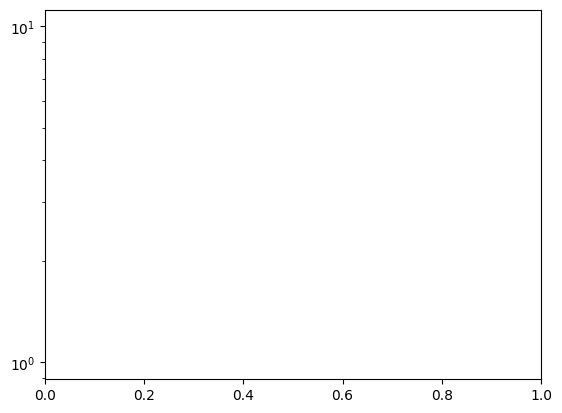

In [226]:
y2 = []
for k in range(0):
    y2.append(results2[k].infidelity)

#plt.plot(y)
plt.yscale("log")

In [227]:



class data():
    def __init__(self, res, penalty):
        self.penalty = penalty
        self.actions = res.actions.flatten()
        self.rewards = res.rewards.flatten()
        self.mus = res.mus.flatten()
        self.oms = res.oms.flatten()
        self.stds = res.stds.flatten()*self.mus
        self.errors = self.mus-self.oms
        self.est_prob = np.sum(self.rewards==0)/len(self.rewards)
        self.succ_prob = np.sum(self.rewards==1)/len(self.rewards)
        self.fidelity = np.sum(self.rewards==1)/(np.sum(self.rewards<0)+np.sum(self.rewards==1))
        self.infidelity = np.sum(self.rewards<0)/(np.sum(self.rewards<0)+np.sum(self.rewards==1))

    def return_row(self):
        row = []
        row.append(self.penalty)
        row.append(np.mean(np.abs(self.errors)))
        row.append(self.est_prob)
        row.append(self.succ_prob)
        row.append(self.fidelity)
        return np.array(row)

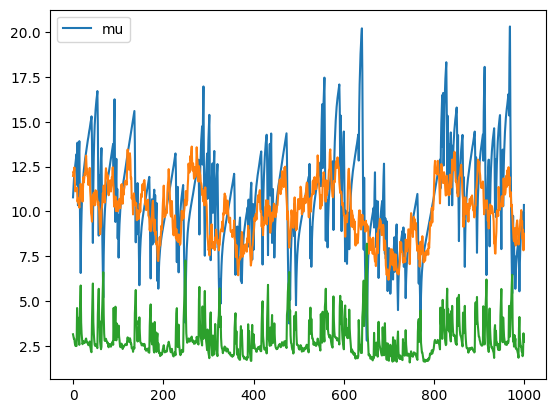

In [229]:
for k in range(1):
                plt.plot(res.mus[k], label = "mu")
                plt.plot(res.oms[k])

                plt.plot(res.stds[k]*res.oms[k])

plt.legend()
#plt.plot(np.abs(res.mus[0] - np.abs(res.oms[0])))

In [155]:
import gymnasium as gym
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.callbacks import EvalCallback
#import monitor
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy

In [158]:


# Save a checkpoint every 1000 steps
'''
checkpoint_callback = CheckpointCallback(
  save_freq=10000,
  save_path="./logs/",
  name_prefix="flex_",
  save_replay_buffer=True,
  save_vecnormalize=True,
)
'''
# Parallel environments
noise = nois.OU_noise(sigma = 1, gamma = 1/100)
logdir ="./ppo_bayes_tensorboard/"
om0 = 10
penalty = [-5]  #-1,-10,-100 are ok
for p in penalty:
    env = est.Moments_estimation(length = 1000, 
                                  om0 = om0, 
                                  noise = noise1f,
                                  max_time = 100,
                                  penalty = p,
                                  time_step = 1,
                                  min_time = 1,
                                  filter = est.Filter(1), buffer_size= 2)
    env = Monitor(env, logdir)
    eval_callback = EvalCallback(env, best_model_save_path="./logs2/ta"+str(p)+"/",
                                log_path="./logs2/"+str(p)+"/ta", eval_freq=50000,
                                deterministic=False, render=False, n_eval_episodes=16) #?

    if not os.path.exists("./ppo_bayes_tensorboard/"):
        os.makedirs("./ppo_bayes_tensorboard/")

    #model = model.load("logs/best_model.zip")
    model = PPO("MlpPolicy", env, 
                n_steps = 1000,
                batch_size = 1000,
                verbose=1, tensorboard_log="./ppo_bayes_tensorboard/", gamma=1 )

    model.learn(total_timesteps=500000, tb_log_name="PPO",callback=eval_callback)


    


Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_bayes_tensorboard/PPO_45
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 205      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 1000     |
---------------------------------
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4

ValueError: Expected parameter logits (Tensor of shape (1, 100)) of distribution Categorical(logits: torch.Size([1, 100])) to satisfy the constraint IndependentConstraint(Real(), 1), but found invalid values:
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan]])

In [ ]:
%tensorboard --logdir ppo_bayes_tensorboard --port 6071

Reusing TensorBoard on port 6071 (pid 23721), started 0:00:20 ago. (Use '!kill 23721' to kill it.)

































]
# Plot the reward for N=100

In [80]:
res2 =  opt.game(N, env, model)

In [81]:
np.sum(res2.rewards)

165.0

Using cpu device
Wrapping the env in a DummyVecEnv.
-6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Probability of estimation:  0.97654
Probability of success:  0.01476
Probability of failing:  0.0087
Probability of success given flip:  0.629156010230179


/Users/krzywdaja/anaconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

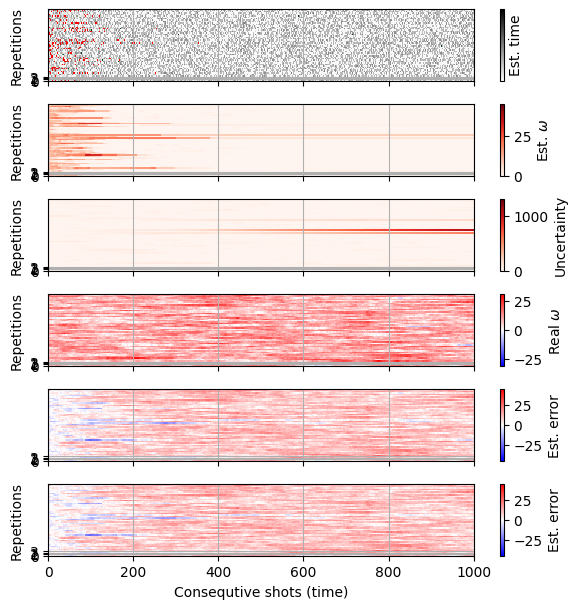

<Figure size 640x480 with 0 Axes>

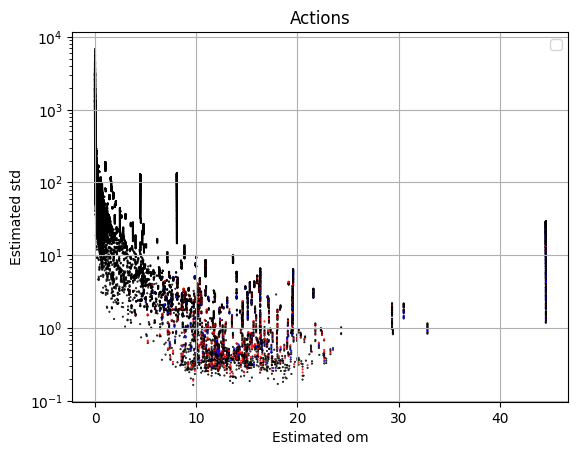

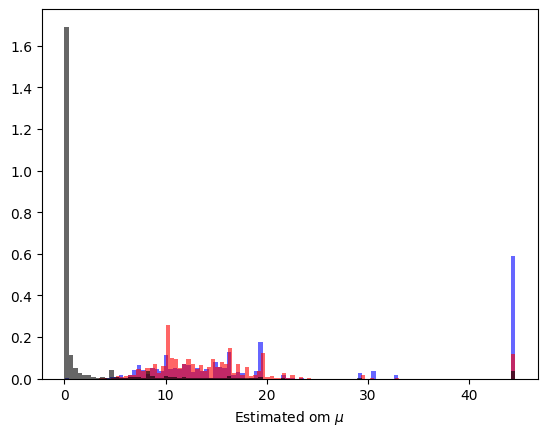

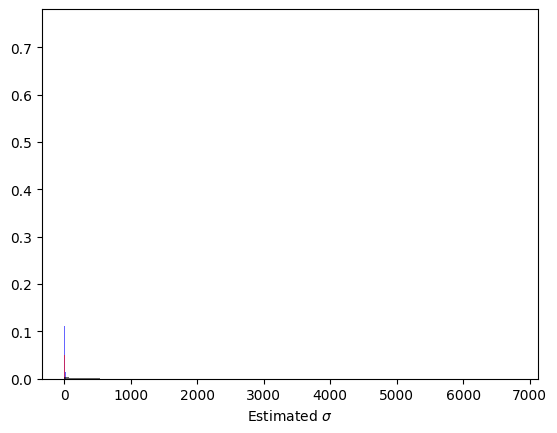

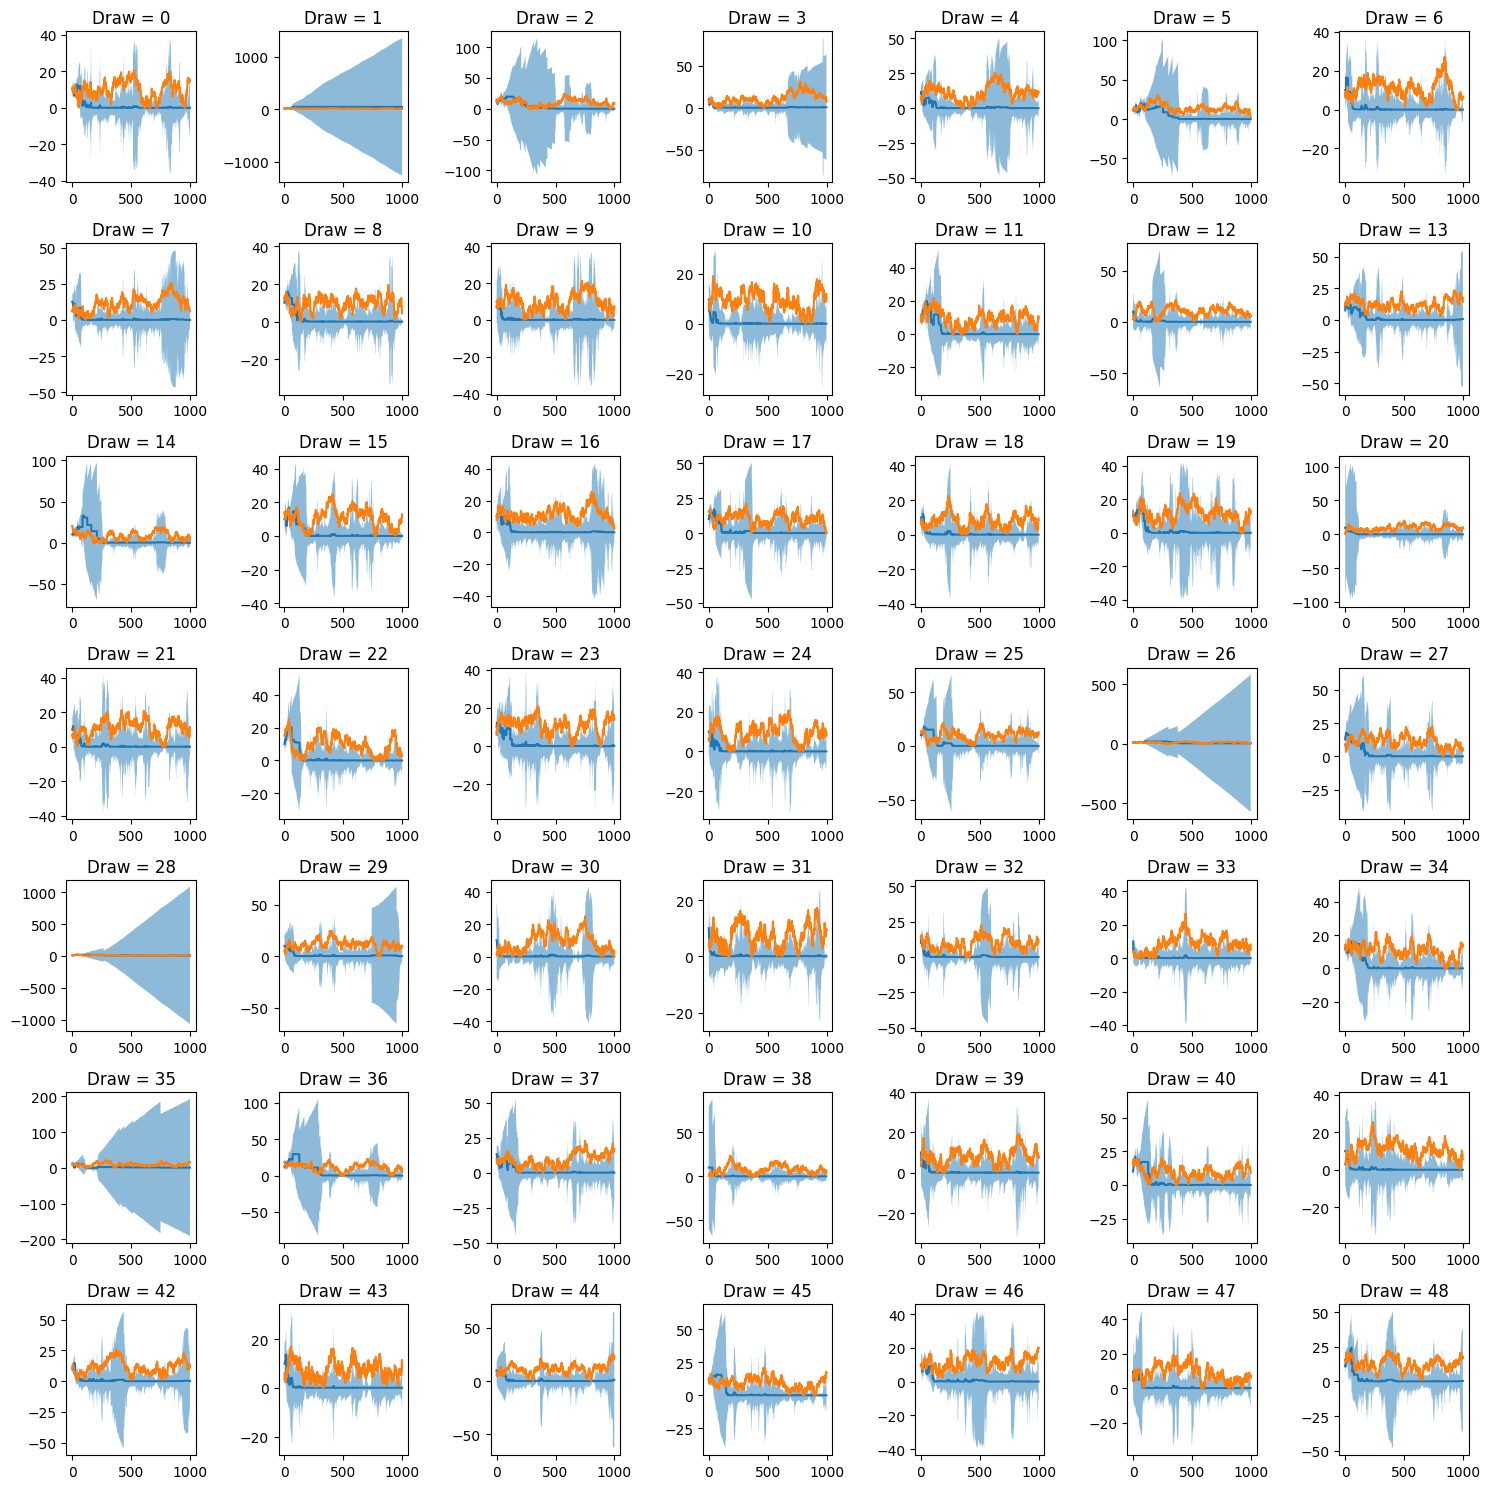

In [47]:
om0 = 10
#penalty = [-0.1,-1,-5,-25]  #with ts = 1, max_time = 50
penalty = [-6]  # with ts = 5, max_time = 81
results = []
L = 1000
N = 50
model = PPO("MlpPolicy", env, 
                n_steps = 1000,
                batch_size=100,
                verbose=1, tensorboard_log="./ppo_bayes_tensorboard/", gamma=1 )

importlib.reload(utl)
for p in penalty:
    env = est.Moments_estimation(length = L, 
                                  om0 = om0, 
                                  noise = noise,
                                  max_time = 50,
                                  cs=cs,
                                  penalty = p,
                                  time_step = 1,
                                  min_time = 1,
                                  filter = est.Filter(1))
    #model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_bayes_tensorboard/", gamma = 1)
    model = model.load("logs2/t2"+str(p)+"/best_model.zip")
   
    res2 =  opt.game(N, env, model)
    print(p)
    plt.figure()
    utl.analyse_few_games4(res2, "1/f")
    #results.append(np.average(res2.rewards.sum(axis=1)))
    plt.figure()
    results.append(res2)
    #utl.analyse_time(res2, "1/f")
    plt.figure()
    utl.analyse_decisions(res2, str(1e3))
    #create 4x4 subplots
    fig, axs = plt.subplots(int(np.sqrt(N)), int(np.sqrt(N)), figsize=(15, 15))
    #draw 16 integers from 0 to 50
    for i, ax in enumerate(axs.flat):
        ax.plot(res2.mus[i])
        ax.plot(np.abs(res2.oms[i]))
        ax.fill_between(np.arange(L), res2.mus[i] - res2.stds[i]*res2.mus[i], res2.mus[i] + res2.stds[i]*res2.mus[i], alpha=0.5)
        ax.set_title(f"Draw = {i}")
        #ax.set_ylim(0,50)
plt.tight_layout()



#res1 = evaluate_policy(model, env, n_eval_episodes=N, deterministic=False, return_episode_rewards=True)



In [31]:
class data():
    def __init__(self, res, penalty):
        self.penalty = penalty
        self.actions = 
        self.mus = 
        self.oms = 
        self.stds = 
        self.errors = 
        self.est_prob = 
        self.succ_prob = 
        self.fidelity =

    def return_row(self):
        row = []
        row.append(np.mean(np.abs(self.errors)))
        row.append(self.penalty)
        row.append(self.est_prob)
        row.append(self.succ_prob)
        row.append(self.fidelity)

[8880.568, 8510.6, 6908.18, 4695.94]


In [ ]:
#create 4x4 subplots
fig, axs = plt.subplots(int(np.sqrt(N)), int(np.sqrt(N)), figsize=(15, 15))
#draw 16 integers from 0 to 50
draws = np.random.randint(0,N,100)
for i, ax in enumerate(axs.flat):
    ax.plot(res2.mus[i])
    ax.plot(np.abs(res2.oms[i]))
    ax.fill_between(np.arange(100), res2.mus[i] - res2.stds[i]*res2.mus[i], res2.mus[i] + res2.stds[i]*res2.mus[i], alpha=0.5)
    ax.set_title(f"Draw = {draws[i]}")
    #ax.set_ylim(0,50)
    ax.set_xlim(0,100)
plt.tight_layout()

In [ ]:
import utils as utl
importlib.reload(utl)
import numpy as np
import optimisation as opt
import moments_backend as est
import importlib
import noise as nois
importlib.reload(opt)
importlib.reload(est)
importlib.reload(nois)
utl.analyse_few_games4(res2, "1/f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 640x480 with 0 Axes>

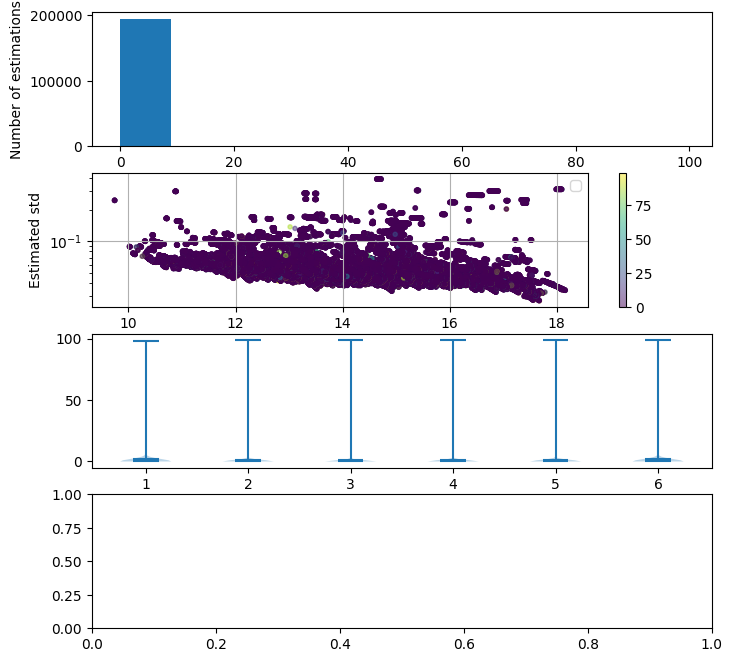

In [16]:
utl.analyse_time(res2, "1/f")

In [ ]:
utl.analyse_decisions(res2, str(1e3))

In [ ]:
plt.plot(res2.mus[8])
plt.plot(np.abs(res2.oms[8]))

In [ ]:
plt.figure(figsize= (3,2))
x = res2.mus[res2.actions[0]==1].flatten()
y = res2.stds[res2.actions[0]==1].flatten()
c = res2.actions[1][res2.actions[0]==1].flatten()


plt.scatter(x,y/x,c=c, alpha=0.5, marker=".", cmap="Grays", vmax = 2*np.max(c))

plt.xlabel("Estiamted field $\mu$")
plt.ylabel("Uncertainty $\sigma/\mu$")
c = plt.colorbar()
c.set_label("Estimation time")
x = res2.mus[res2.actions[0]==0].flatten()
y = res2.stds[res2.actions[0]==0].flatten()
c = res2.rewards[res2.actions[0]==0].flatten()

plt.scatter(x,y/x,c=c, alpha=0.5, marker=".", cmap="bwr")
#get rid of the frame of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()



In [ ]:


tcs = [1e3]
for tc in tcs:


    samples = 6
    model = model.load("flex")


    results = opt.game(episodes = samples, model=model, env=env)
    
    est.analyse_few_games(results, str(tc))



In [ ]:
for tc in tcs:


    samples = 20
    model.load("ppo_N1e3_check_"+str(tc))
    env = est.EstimationEnv(length = int(1e3), tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                        seed_shot= seed_environment, seed_field = seed_environment)

    results = opt.game(episodes = samples, model=model, env=env)

    est.analyse_decisions(results, str(tc))



In [ ]:
env.tc

In [ ]:

policies = opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval
bounds = [np.array([[0,1],[0,1],[0,1]]),
            np.array([[0,10],[0,1]]),
            np.array([[0,100],[0,1]]),
            np.array([[0,100],[0,100],[0,100]])]
sigmas = [np.array(0.5), np.array(50.), np.array(50.), np.array(50.)]
means = [np.array([0.7,0.2,0.1]), np.array([5.,0.5]), np.array([50.,0.2]), np.array([50.,10.,2.])]


xs = []
for tc in [1e3]:
    xs_tc = []
    for pn,policy in enumerate(policies):
        if pn==0:
            print(bounds[pn])
            print(sigmas[pn])
            print(means[pn])
            env = est.EstimationEnv(length = 1000, tc = 1e3, om0=om0, sigma = sigma, initial_std=initial_std,
                            seed_field = None, seed_shot = None)
            Opt = opt.CMA_optimizer(policy = policies[pn], 
                            generations = 20, 
                            population_size=10, 
                            bounds = bounds[pn], 
                            sigma = sigmas[pn], 
                            mean= means[pn], 
                            episodes = 20,
                            env=env)
            sol = Opt.optimize()
            x_avg, f_avg = Opt.get_representative()
            xs_tc.append(x_avg)
    xs.append(xs_tc)
    

In [ ]:
xs_tc

In [ ]:
#save nested xs list to file
import pickle
with open('xs2.pkl', 'wb') as f:
    pickle.dump(xs, f)


In [ ]:
#load nested xs list from file
import pickle
with open('xs.pkl', 'rb') as f:
    xs = pickle.load(f)


In [ ]:
xs

In [ ]:
sol[:,:,:3] = sol[:,:,:3]/np.sum(sol[:,:,:3],axis=2)[...,None]
for k in range(4):
    plt.scatter(sol[k,:,0], sol[k,:,1], label = str(k))
plt.legend()

In [ ]:
import numpy as np
import optimisation as opt
import estimation_environment as est
import importlib
importlib.reload(opt)
importlib.reload(est)
policies = 7
'''
-always flip
-random
-random with flip p =0.8, est p = 0.15, check p = 0,5
-flip only if std/mu below 0.5
-flip only if mu is above 10
-estimate 5 shots every 30 shots
-agent
'''





#model = model.load("ppo_bayes2")

samples = 50

policies_all = opt.policy_flip, opt.policy_random, opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval

tot_reward = np.zeros((len(tcs),len(policies_all)+1,samples))

for tcn, tc in enumerate(tcs):
    model.load("ppo_N500_"+str(tc))
    
    for pn,policy in enumerate(policies_all):
        
        env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
        if pn>1:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, x = xs[tcn][pn-2], rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
        else:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
    
    env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
    results = opt.game(episodes = samples, model=model, env=env)
    tot_reward[tcn,-1,:] =  np.sum(results.rewards,axis=1)

In [ ]:
tcs

In [ ]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8)-.2+tcn*0.2, widths=0.5)
plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                            "Estimation intervals","Agent"])
plt.ylabel("Total reward")
#plt.ylim(-200,550)
plt.grid()
plt.plot([],[],color = "blue", label="tc = 100")
plt.plot([],[],color = "orange", label="tc = 200")
plt.plot([],[],color = "green", label="tc = 300")
plt.legend(loc="lower right")


In [ ]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.figure(figsize=(13,5))
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8), widths=0.5)
    plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                                "Estimation intervals","Agent"])
    plt.ylabel("Total reward")
    plt.grid()
    plt.title("tc = "+str(tc))
    #plt.ylim(-200,550)
plt.plot([],[],color = "blue", label="tc = 50")
plt.plot([],[],color = "orange", label="tc = 500")
plt.plot([],[],color = "green", label="tc = 5000")
#plt.legend(loc="lower right")